<a href="https://colab.research.google.com/github/vanecornejo/Investigacion-de-operaciones/blob/main/Proyecto%20PERT/CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Proyecto: Viaje a Italia — PERT / CPM**

Castellanos Sánchez Omar

Martinez Cornejo Vanessa

--------------------------------
La **ruta crítica** es una técnica utilizada en la administración de proyectos para planificar, programar y controlar las actividades necesarias para alcanzar un objetivo dentro de un tiempo determinado. Se centra en identificar la secuencia de tareas que determina la duración total del proyecto, es decir, aquellas actividades que no pueden retrasarse sin que se retrase también la fecha final del proyecto.

En este proyecto se listan las actividades principales para la planeación de un viaje a Italia. Se incluye todas las actividades necesarias, desde decidir el destino hasta la fecha de salida.  

La tabla de actividades:

|Código|Actividad|Predecesores|Duración (días)|
|------|----------|-------------|---------------|
|A|Decidir destino|—|2|
|B|Pasaporte/visa|A|10|
|C|Reservar vuelos|A, B|3|
|D|Reservar hotel|A|6|
|E|Seguro de viaje|C, D|2|
|F|Vestimenta/equipaje|A|4|
|G|Empacar y preparativos finales|E, F|3|
|H|Día de salida|G|1|


El grafo que nos muestra la red del proyecto de viaje a Italia:

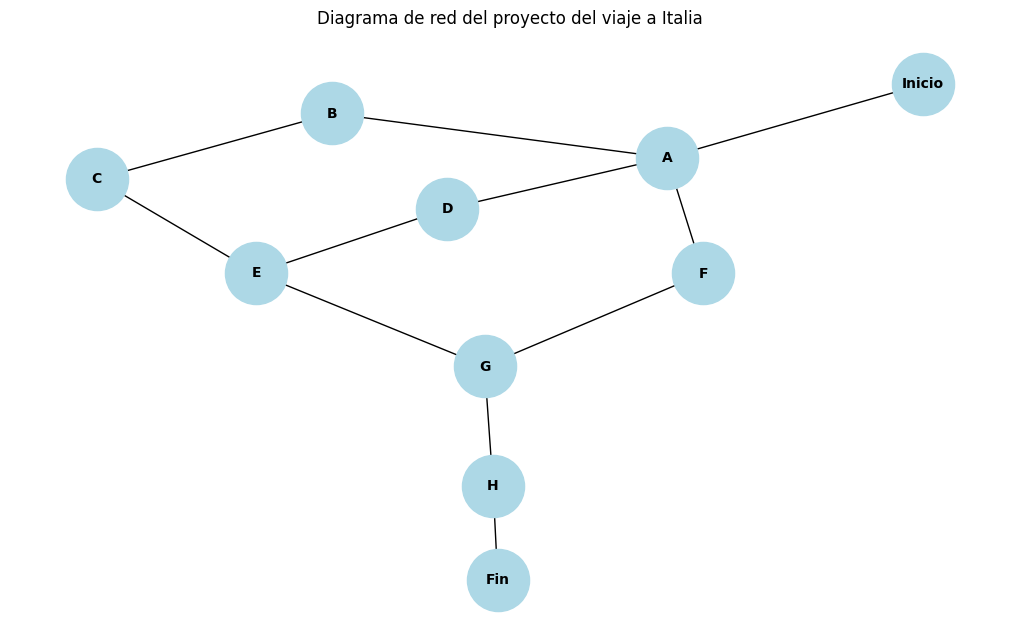

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(["Inicio","A","B","C","D","E","F","G","H","Fin"])

G.add_edge('Inicio','A')
G.add_edge('A','B')
G.add_edge('B','C')
G.add_edge('A','D')
G.add_edge('C','E')
G.add_edge('D','E')
G.add_edge('A','F')
G.add_edge('E','G')
G.add_edge('F','G')
G.add_edge('G','H')
G.add_edge('H','Fin')

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Diagrama de red del proyecto del viaje a Italia")
plt.show()


La tabla de costos (en pesos mexicanos):

In [11]:
import pandas as pd

costs = [
    ('A','Decidir destino', 2,1,0,0,0),
    ('B','Pasaporte / visa',10,5,2500,4000,300),
    ('C','Reservar vuelos',3,1,16000,19000,1500),
    ('D','Reservar hotel',6,1,12000,13000,1000),
    ('E','Seguro de viaje',2,1,1000,1400,200),
    ('F','Vestimenta / equipaje',4,2,4000,4600,300),
    ('G','Empacar / preparativos',3,2,0,500,250),
    ('H','Salida',1,1,0,0,0),
]

df_costs = pd.DataFrame(costs, columns=['Actividad','Descripción','Tiempo normal','Tiempo mínimo','Costo normal (MXN)','Costo mínimo (MXN)','Costo por día reducido (MXN)'])
df_costs


,Actividad,Descripción,Tiempo normal,Tiempo mínimo,Costo normal (MXN),Costo mínimo (MXN),Costo por día reducido (MXN)
0,A,Decidir destino,2,1,0,0,0
1,B,Pasaporte / visa,10,5,2500,4000,300
2,C,Reservar vuelos,3,1,16000,19000,1500
3,D,Reservar hotel,6,1,12000,13000,1000
4,E,Seguro de viaje,2,1,1000,1400,200
5,F,Vestimenta / equipaje,4,2,4000,4600,300
6,G,Empacar / preparativos,3,2,0,500,250
7,H,Salida,1,1,0,0,0


La tabla final con el tiempo y costo total del proyecto

In [12]:
resumen = pd.DataFrame({
    'Duración total del proyecto (días)': [31],
    'Duración final después de minimizar (días)': [17],
    'Reducción (días)': [3],
    'Costo total minimizado (MXN)': [3250]
})
resumen


,Duración total del proyecto (días),Duración final después de minimizar (días),Reducción (días),Costo total minimizado (MXN)
0,31,17,3,3250


In [13]:
# Crear el grafo dirigido y agregar nodos con duración
G = nx.DiGraph()
for i, row in df_costs.iterrows():
    G.add_node(row['Actividad'], duracion=row['Tiempo normal'])

# Definir predecesores
predecessors = {
    'A': [],
    'B': ['A'],
    'C': ['B'],
    'D': ['A'],
    'E': ['C','D'],
    'F': ['A'],
    'G': ['E','F'],
    'H': ['G']
}

for activity, preds in predecessors.items():
    for pred in preds:
        G.add_edge(pred, activity)

# Calcular la ruta crítica sumando las duraciones de los nodos
critical_path = nx.dag_longest_path(G, weight=None)
total_duration = sum(G.nodes[n]['duracion'] for n in critical_path)

print("Ruta crítica:", " → ".join(critical_path))
print("Duración total del proyecto:", total_duration, "días")

Ruta crítica: A → B → C → E → G → H
Duración total del proyecto: 21 días


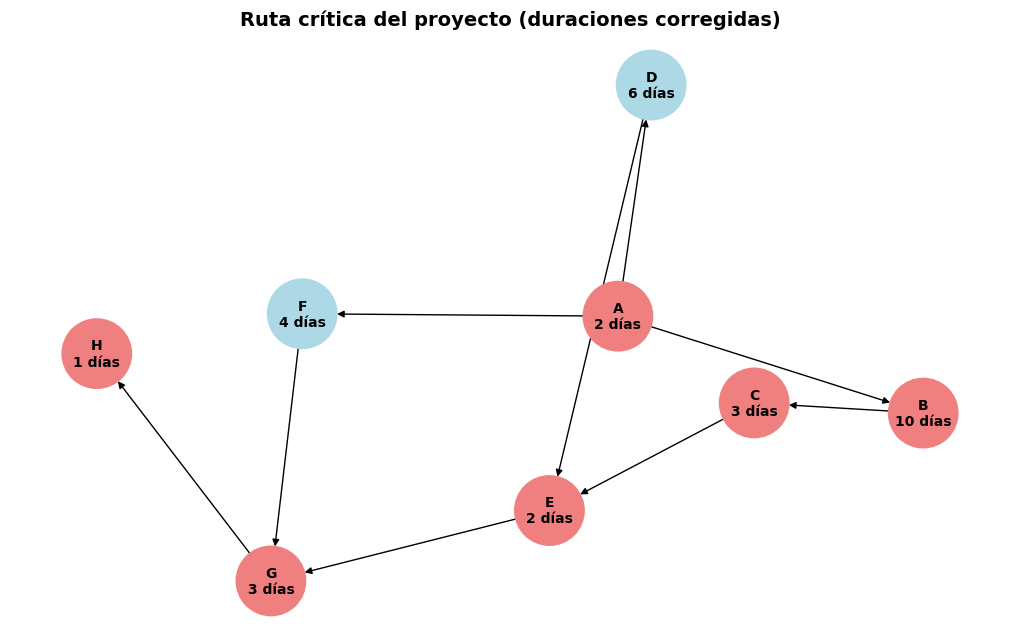

In [14]:
# Posiciones de los nodos
pos = nx.spring_layout(G, seed=42)

# Etiquetas con duración
labels = {n: f"{n}\n{G.nodes[n]['duracion']} días" for n in G.nodes()}

# Colorear la ruta crítica en rojo, las demás actividades en azul
colores = ["lightcoral" if n in critical_path else "lightblue" for n in G.nodes()]

# Dibujar el grafo
plt.figure(figsize=(10,6))
nx.draw(
    G, pos,
    with_labels=True, labels=labels,
    node_size=2500, node_color=colores,
    font_size=10, font_weight="bold", arrows=True
)

plt.title("Ruta crítica del proyecto (duraciones corregidas)", fontsize=14, fontweight="bold")
plt.show()

## Ruta Crítica

De acuerdo con el análisis, la **ruta crítica** del proyecto del viaje a Italia es:  

**A → B → C → E → G → H**  

La ruta critica es la secuencia de actividades más larga (en tiempo) del proyecto.